In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [168]:
df= pd.read_csv("C:/Users/karth/Downloads/house-prices-advanced-regression-techniques/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [170]:
#colmens that contain more than half of their data as null
nan_percentage = df.isna().mean()
# nan_percentage[nan_percentage!=0]
high_nan_cols = nan_percentage[nan_percentage > 0.50].index.tolist()
high_nan_cols

['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

In [171]:
df = df.drop(high_nan_cols, axis=1)

In [174]:
#To classify the columns into these categories: categorical columns, categorical but cardinal columns and numerical columns.
def grab_col_names(dataframe, cat_th=13):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_cols = cat_cols + num_but_cat
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"num_but_cat: {len(num_but_cat)}")
    return cat_cols, num_cols, num_but_cat

cat_cols, num_cols, num_but_cat = grab_col_names(df)

Observations: 1460
Variables: 76
cat_cols: 52
num_cols: 24
num_but_cat: 14


In [176]:
for col in num_but_cat:
    print(col,':',df[col].unique())

OverallQual : [ 7  6  8  5  9  4 10  3  1  2]
OverallCond : [5 8 6 7 4 2 3 9 1]
BsmtFullBath : [1 0 2 3]
BsmtHalfBath : [0 1 2]
FullBath : [2 1 3 0]
HalfBath : [1 0 2]
BedroomAbvGr : [3 4 1 2 0 5 6 8]
KitchenAbvGr : [1 2 3 0]
TotRmsAbvGrd : [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces : [0 1 2 3]
GarageCars : [2 3 1 0 4]
PoolArea : [  0 512 648 576 555 480 519 738]
MoSold : [ 2  5  9 12 10  8 11  4  1  7  3  6]
YrSold : [2008 2007 2006 2009 2010]


In [177]:
numlist=['BedroomAbvGr', 'PoolArea', 'TotRmsAbvGrd']

new_cats=set(cat_cols)
new_num_cols=set(num_cols)
numlist = set(numlist)

new_cats = new_cats - numlist
new_num_cols = new_num_cols | numlist

cat_cols= list(new_cats)
num_cols = list(new_num_cols)

print('cat_cols',len(cat_cols))
print('num_cols',len(num_cols))

cat_cols 49
num_cols 27


In [178]:
df.BsmtQual.mode()

0    TA
Name: BsmtQual, dtype: object

In [179]:
#handeling null values
for col in df.columns:
    if col in num_cols:
        df[col] = df[col].fillna(df[col].mean())
    elif col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [180]:
#handeling outliers
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
    
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(col, ':', check_outlier(df, col))

GarageYrBlt : True
LotFrontage : True
SalePrice : True
TotRmsAbvGrd : True
GarageArea : True
MiscVal : True
PoolArea : True
GrLivArea : True
BsmtUnfSF : True
1stFlrSF : True
Id : False
BedroomAbvGr : True
BsmtFinSF1 : True
MasVnrArea : True
YearRemodAdd : False
3SsnPorch : True
LowQualFinSF : True
EnclosedPorch : True
TotalBsmtSF : True
ScreenPorch : True
YearBuilt : True
LotArea : True
2ndFlrSF : True
MSSubClass : True
WoodDeckSF : True
BsmtFinSF2 : True
OpenPorchSF : True


In [181]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

#replace the outliers with thresholds
for col in num_cols:
    replace_with_thresholds(df, col)

C:\Users\karth\AppData\Local\Temp\ipykernel_21192\1637879556.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3937.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
C:\Users\karth\AppData\Local\Temp\ipykernel_21192\1637879556.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-27.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
C:\Users\karth\AppData\Local\Temp\ipykernel_21192\1637879556.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '158.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.l

In [182]:
for col in num_cols:
    print(col, ':', check_outlier(df, col))

GarageYrBlt : False
LotFrontage : False
SalePrice : False
TotRmsAbvGrd : False
GarageArea : False
MiscVal : False
PoolArea : False
GrLivArea : False
BsmtUnfSF : False
1stFlrSF : False
Id : False
BedroomAbvGr : False
BsmtFinSF1 : False
MasVnrArea : False
YearRemodAdd : False
3SsnPorch : False
LowQualFinSF : False
EnclosedPorch : False
TotalBsmtSF : False
ScreenPorch : False
YearBuilt : False
LotArea : False
2ndFlrSF : False
MSSubClass : False
WoodDeckSF : False
BsmtFinSF2 : False
OpenPorchSF : False


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# EDA

In [184]:
threshold = 0.90  # Define a threshold for considering a column as biased

biased_columns = []
for col in df.columns:
    if col == 'SalePrice':
        continue
    top_value_percentage = df[col].value_counts(normalize=True).values[0]
    if top_value_percentage > threshold:
        biased_columns.append(col)

print("Biased columns:")
print(biased_columns)

Biased columns:
['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


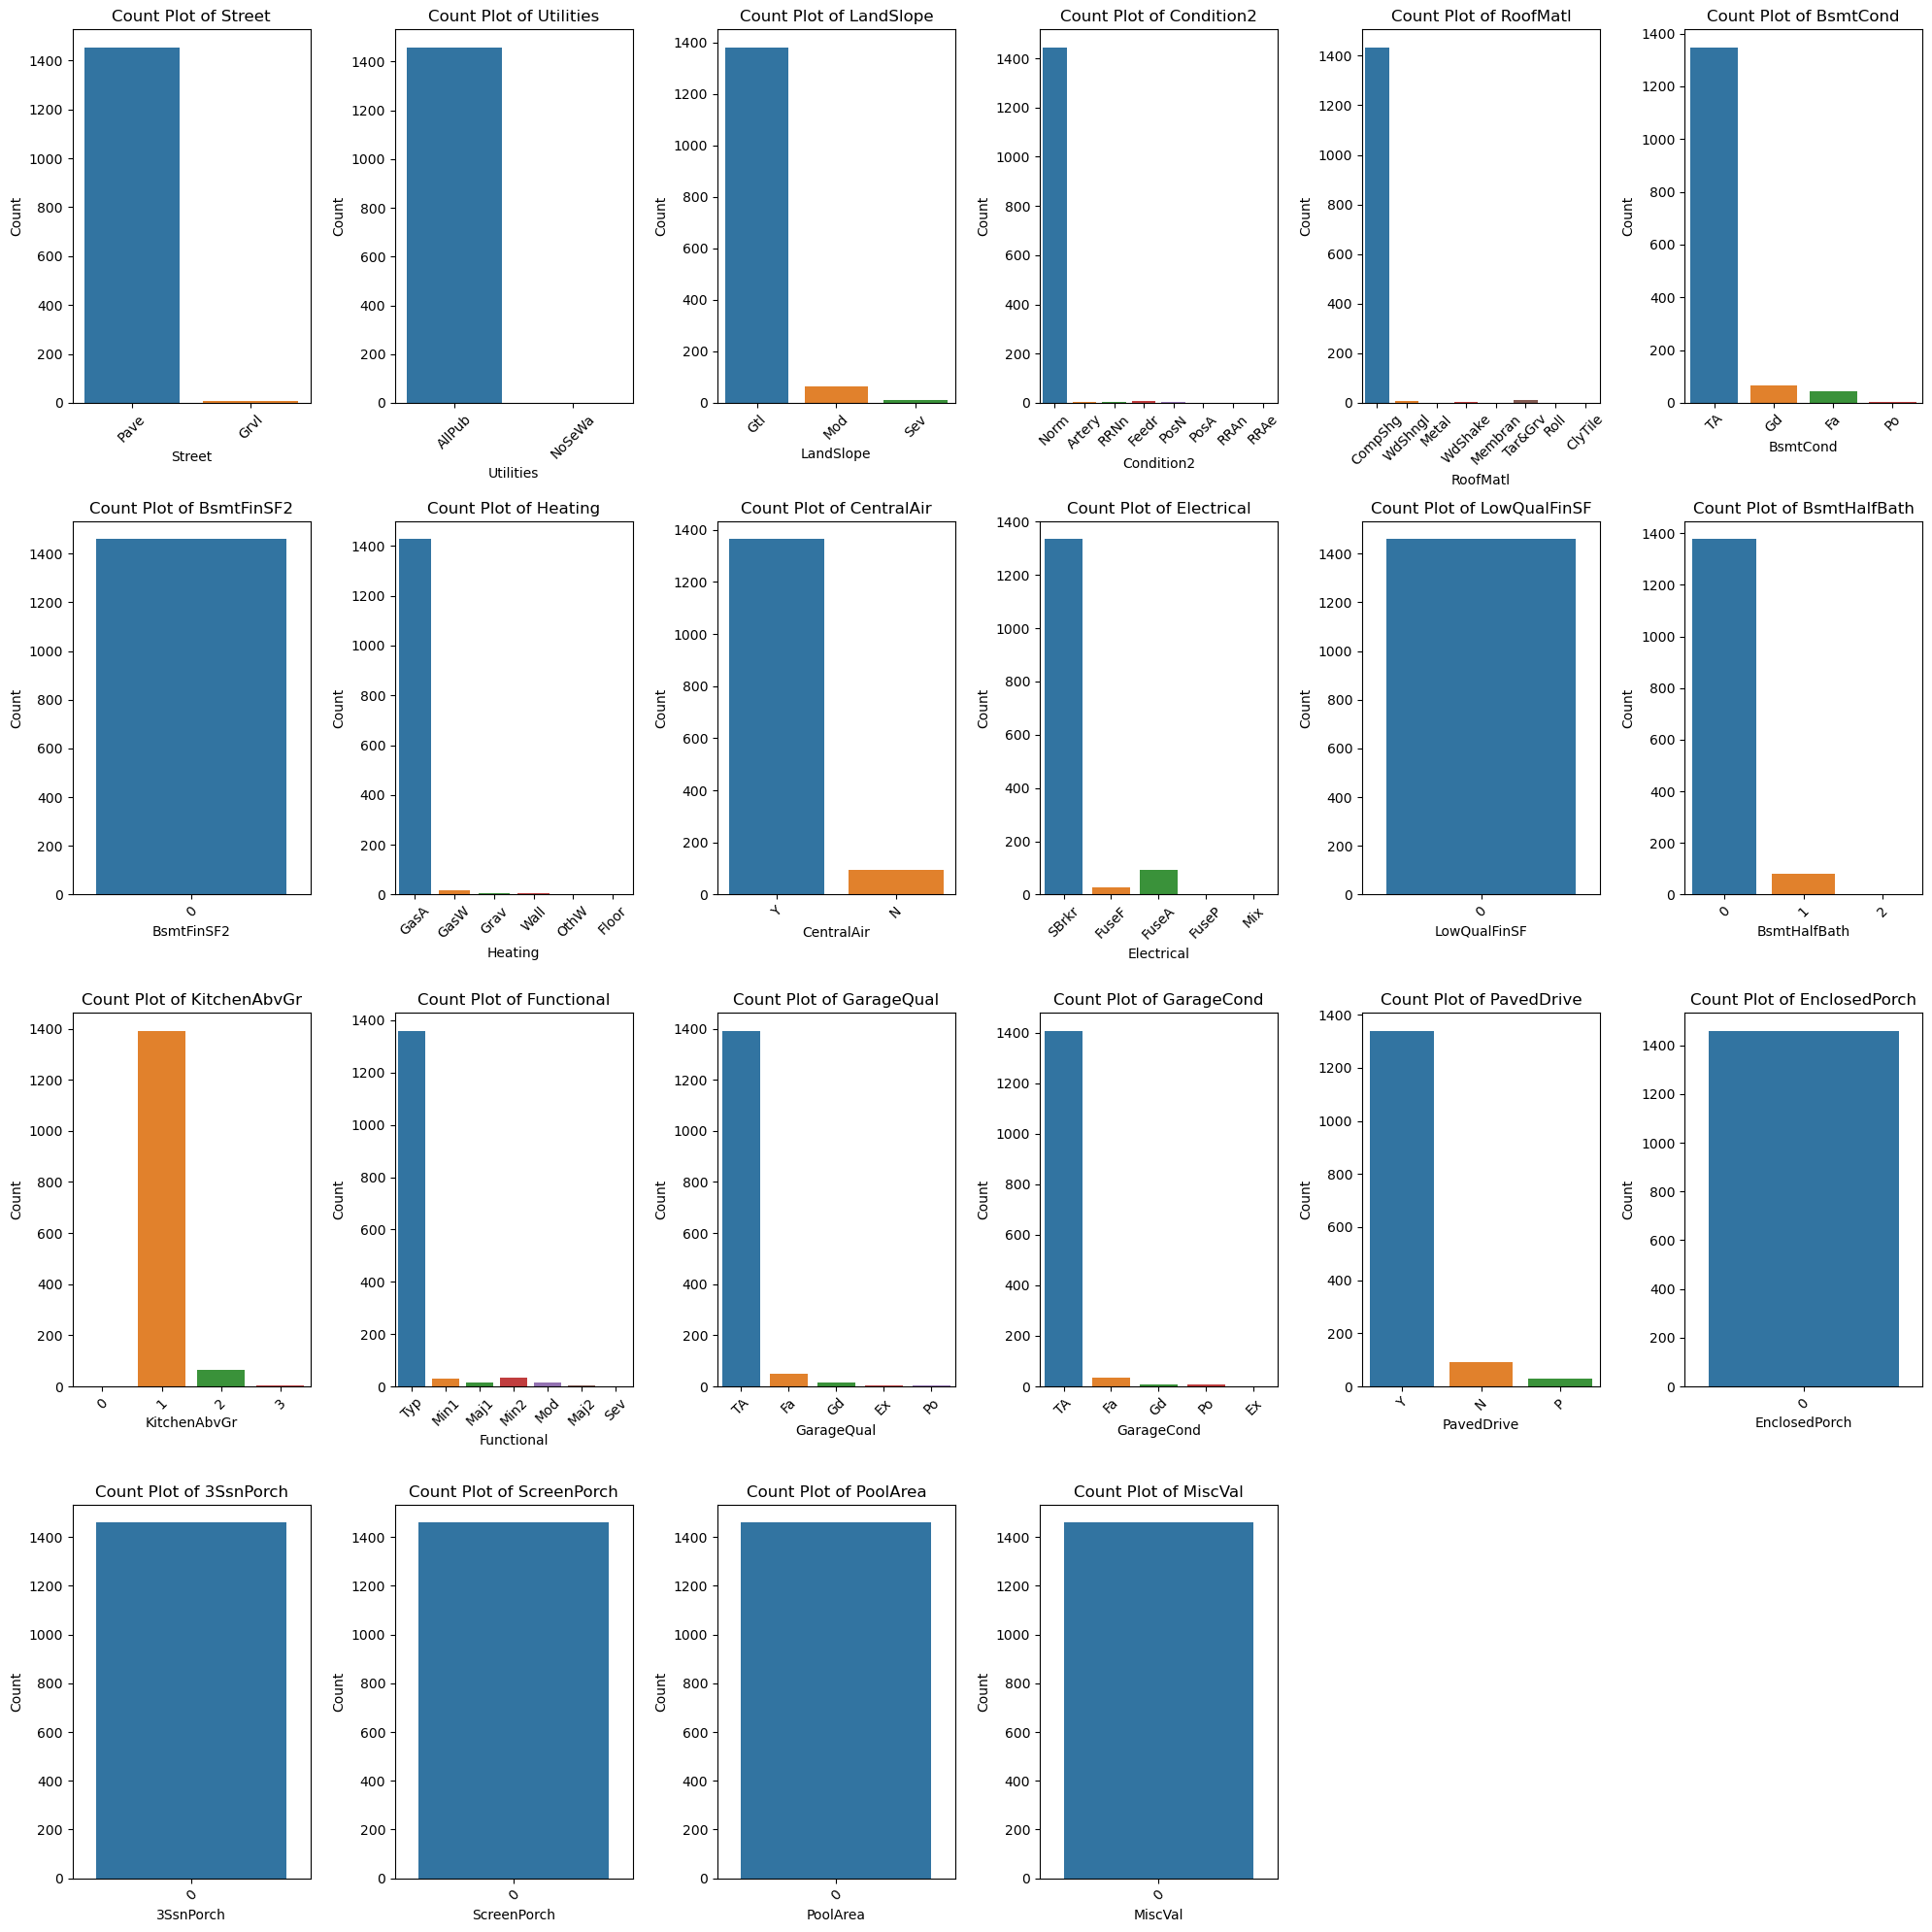

In [185]:
# Determine the number of rows and columns for subplots
n_cols = 6
n_rows = -(-len(biased_columns) // n_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create count plots for each categorical column
for i, col in enumerate(biased_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [186]:
df = df.drop(columns=biased_columns)
print(f"Columns after dropping biased ones: {df.columns.tolist()}")

Columns after dropping biased ones: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']


In [187]:
new_cats=set(cat_cols)
new_num_cols=set(num_cols)
biased_columns = set(biased_columns)

new_cats = new_cats - biased_columns
new_num_cols = new_num_cols - biased_columns

cat_cols= list(new_cats)
num_cols = list(new_num_cols)

print('cat_cols',len(cat_cols))
print('num_cols',len(num_cols))

cat_cols 34
num_cols 20


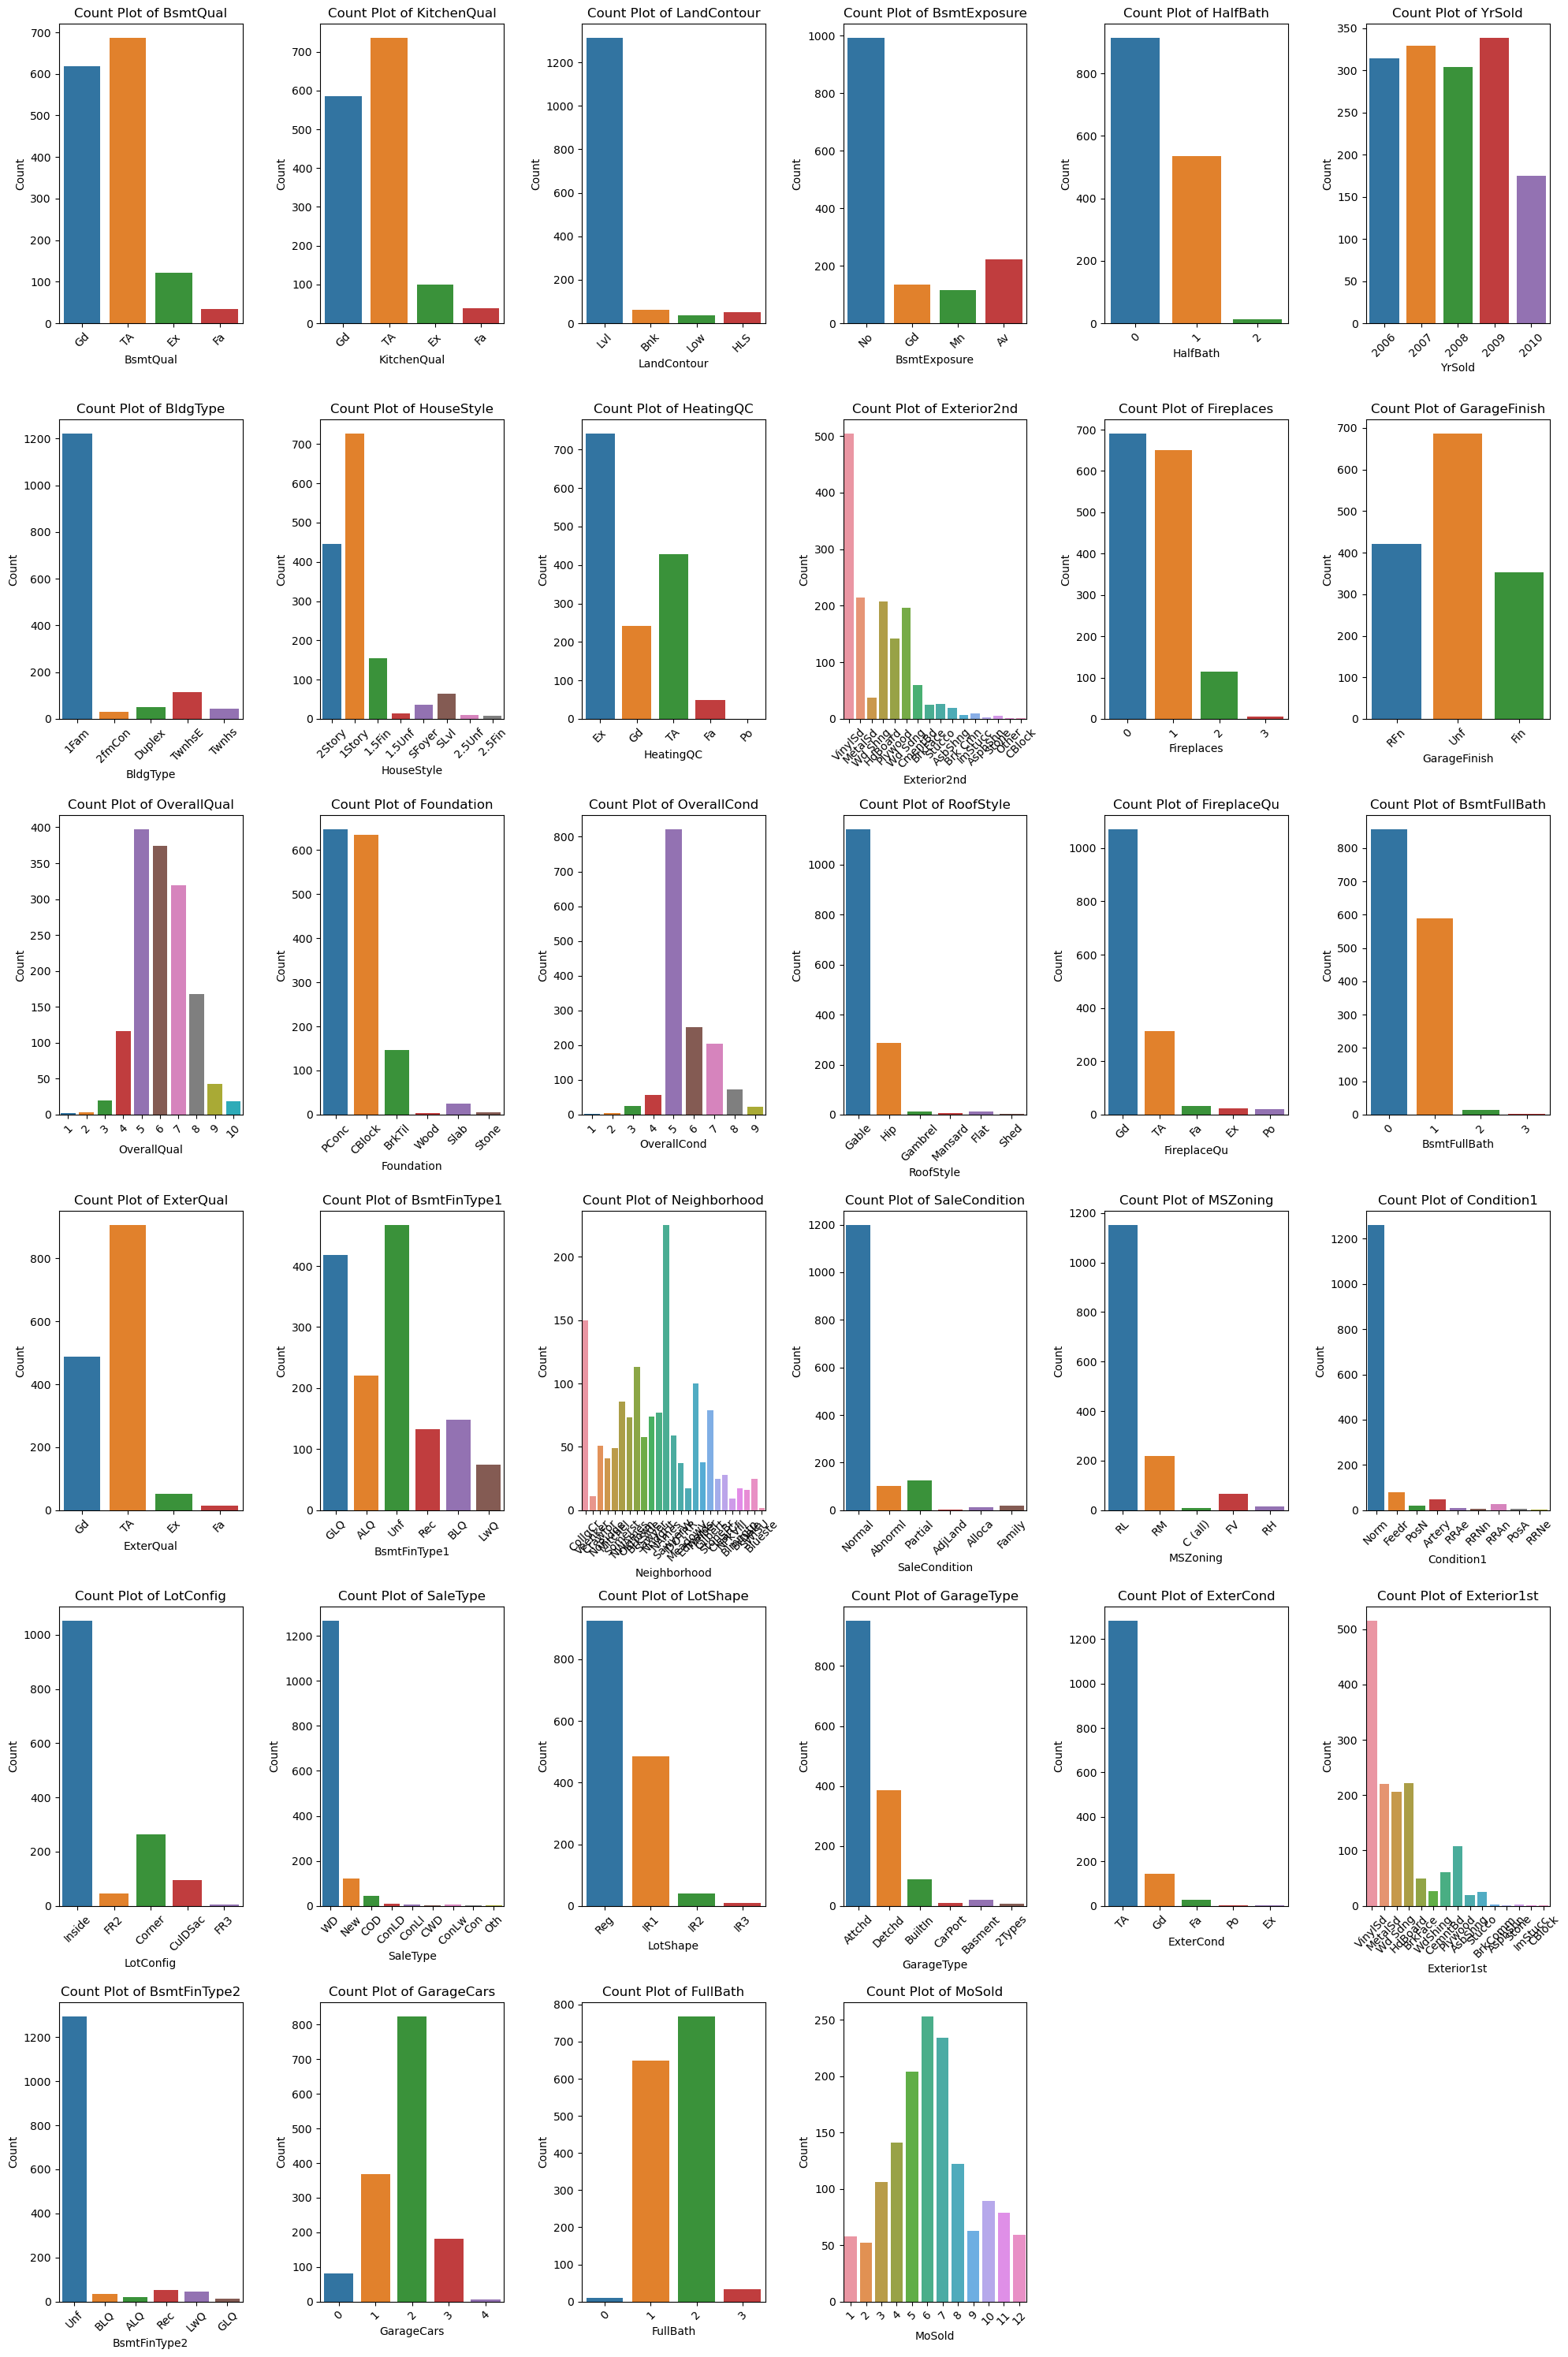

In [188]:
# Determine the number of rows and columns for subplots
n_cols = 6
n_rows = -(-len(cat_cols) // n_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Create count plots for each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

# Feature engineering

In [191]:
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is categorical
        df[column] = label_encoder.fit_transform(df[column])

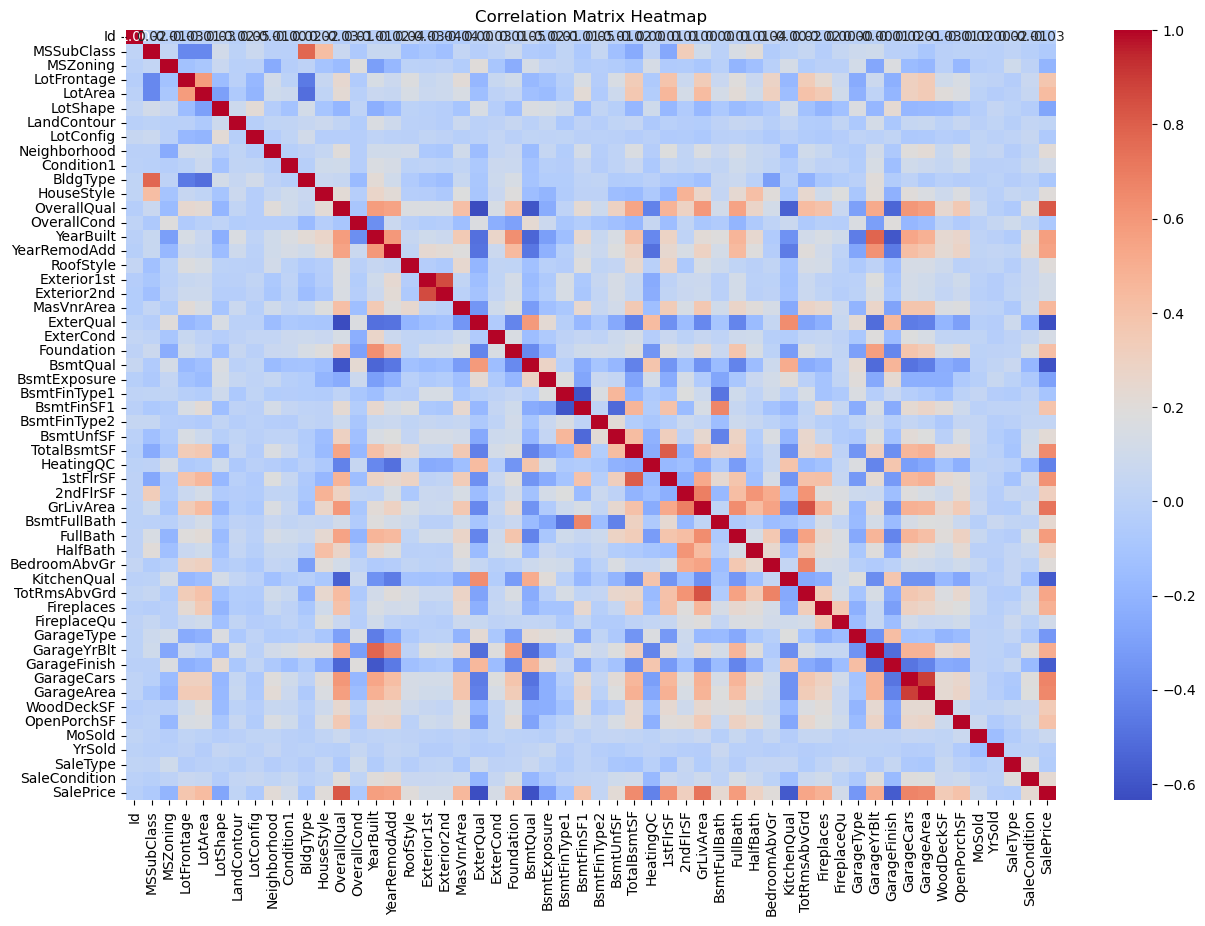

In [204]:
correlation_matrix = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [305]:
target_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)

# Define a threshold
threshold = 0.001

# Select features with correlation above the threshold
important_features = target_corr[abs(target_corr)> threshold].index.tolist()

print("Important features based on correlation with target:\n", len(important_features))


Important features based on correlation with target:
 54


In [370]:
important_features = [col for col in df.columns if col !='SalePrice' and col !='Id']

X_train, X_test, y_train, y_test = train_test_split(df[important_features], df['SalePrice'], test_size=0.2, random_state=42)

print("Training set shape: ", X_train.shape)
print("Testing set shape: ", X_test.shape)

Training set shape:  (1168, 52)
Testing set shape:  (292, 52)


# processing test data

In [392]:
test=pd.read_csv("C:/Users/karth/Downloads/house-prices-advanced-regression-techniques/test.csv")
test_id = test['Id']
test=test[important_features ]
test

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Reg,Lvl,Inside,NAmes,Feedr,1Fam,...,1961.0,Unf,1.0,730.0,140,0,6,2010,WD,Normal
1,20,RL,81.0,14267,IR1,Lvl,Corner,NAmes,Norm,1Fam,...,1958.0,Unf,1.0,312.0,393,36,6,2010,WD,Normal
2,60,RL,74.0,13830,IR1,Lvl,Inside,Gilbert,Norm,1Fam,...,1997.0,Fin,2.0,482.0,212,34,3,2010,WD,Normal
3,60,RL,78.0,9978,IR1,Lvl,Inside,Gilbert,Norm,1Fam,...,1998.0,Fin,2.0,470.0,360,36,6,2010,WD,Normal
4,120,RL,43.0,5005,IR1,HLS,Inside,StoneBr,Norm,TwnhsE,...,1992.0,RFn,2.0,506.0,0,82,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Reg,Lvl,Inside,MeadowV,Norm,Twnhs,...,NaN,NaN,0.0,0.0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Reg,Lvl,Inside,MeadowV,Norm,TwnhsE,...,1970.0,Unf,1.0,286.0,0,24,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Reg,Lvl,Inside,Mitchel,Norm,1Fam,...,1960.0,Unf,2.0,576.0,474,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Reg,Lvl,Inside,Mitchel,Norm,1Fam,...,NaN,NaN,0.0,0.0,80,32,7,2006,WD,Normal


In [372]:
#handeling null values
test_cat_col, test_num_col, num_cat= grab_col_names(test)
for col in test.columns:
    if col in test_num_col:
        test[col] = test[col].fillna(test[col].mean())
    elif col in test_cat_col:
        test[col] = test[col].fillna(test[col].mode()[0])
test.info()

Observations: 1459
Variables: 52
cat_cols: 36
num_cols: 16
num_but_cat: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   LotShape       1459 non-null   object 
 5   LandContour    1459 non-null   object 
 6   LotConfig      1459 non-null   object 
 7   Neighborhood   1459 non-null   object 
 8   Condition1     1459 non-null   object 
 9   BldgType       1459 non-null   object 
 10  HouseStyle     1459 non-null   object 
 11  OverallQual    1459 non-null   int64  
 12  OverallCond    1459 non-null   int64  
 13  YearBuilt      1459 non-null   int64  
 14  YearRemodAdd   1459 non-null   int64  
 15  RoofStyle      1459 non-null   object 
 16  Exterior1st    1459 n

In [373]:
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in test.columns:
    if test[column].dtype == 'object':  # Check if the column is categorical
        test[column] = label_encoder.fit_transform(test[column])

# model training

### Linear Regression

In [374]:
X_train_array = np.array(X_train)
y_train_array = np.array(y_train)
X_test_array = np.array(X_test)
y_test_array = np.array(y_test)

In [375]:
model_lr = LinearRegression()
model_lr.fit(X_train_array, y_train_array)

LinearRegression()

In [376]:
y_pred = model_lr.predict(X_test)

# Mean Absolute Error
mae_lr = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae_lr:.2f}')

# Mean Squared Error
mse_lr = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse_lr:.2f}')

# Root Mean Squared Error
rmse_lr = np.sqrt(mse_lr)
print(f'Root Mean Squared Error (RMSE): {rmse_lr:.2f}')

# R-squared
r2_lr = r2_score(y_test, y_pred)
print(f'R-squared: {r2_lr:.2f}')

Mean Absolute Error (MAE): 16004.77
Mean Squared Error (MSE): 464924296.88
Root Mean Squared Error (RMSE): 21562.10
R-squared: 0.90


C:\Users\karth\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### svr

In [377]:
from sklearn.svm import SVR

model_svr = SVR(kernel='rbf')
model_svr.fit(X_train, y_train)

SVR()

In [378]:
y_pred_svr = model_svr.predict(X_test)

# Mean Absolute Error
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print(f'Mean Absolute Error (MAE): {mae_svr:.2f}')

# Mean Squared Error
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'Mean Squared Error (MSE): {mse_svr:.2f}')

# Root Mean Squared Error
rmse_svr = np.sqrt(mse_svr)
print(f'Root Mean Squared Error (RMSE): {rmse_svr:.2f}')

# R-squared
r2_svr = r2_score(y_test, y_pred_svr)
print(f'R-squared: {r2_svr:.2f}')

Mean Absolute Error (MAE): 54606.99
Mean Squared Error (MSE): 4964888206.75
Root Mean Squared Error (RMSE): 70461.96
R-squared: -0.02


### Polynomial Regression

In [379]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

degree = 2
poly_features = PolynomialFeatures(degree)
model_ply = make_pipeline(poly_features, LinearRegression())
model_ply.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [380]:
y_pred_ply = model_ply.predict(X_test)

# Mean Absolute Error
mae_ply = mean_absolute_error(y_test, y_pred_ply)
print(f'Mean Absolute Error (MAE): {mae_ply:.2f}')

# Mean Squared Error
mse_ply = mean_squared_error(y_test, y_pred_ply)
print(f'Mean Squared Error (MSE): {mse_ply:.2f}')

# Root Mean Squared Error
rmse_ply = np.sqrt(mse_ply)
print(f'Root Mean Squared Error (RMSE): {rmse_ply:.2f}')

# R-squared
r2_ply = r2_score(y_test, y_pred_ply)
print(f'R-squared: {r2_ply:.2f}')

Mean Absolute Error (MAE): 114178.29
Mean Squared Error (MSE): 148419696755.31
Root Mean Squared Error (RMSE): 385252.77
R-squared: -29.36


### Decision Tree Regressor

In [381]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [382]:
y_pred_dt = model_dt.predict(X_test)

# Mean Absolute Error
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print(f'Mean Absolute Error (MAE): {mae_dt:.2f}')

# Mean Squared Error
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Mean Squared Error (MSE): {mse_dt:.2f}')

# Root Mean Squared Error
rmse_dt = np.sqrt(mse_dt)
print(f'Root Mean Squared Error (RMSE): {rmse_dt:.2f}')

# R-squared
r2_dt = r2_score(y_test, y_pred_dt)
print(f'R-squared: {r2_dt:.2f}')

Mean Absolute Error (MAE): 22663.57
Mean Squared Error (MSE): 1076527540.75
Root Mean Squared Error (RMSE): 32810.48
R-squared: 0.78


### Ridge Regressor

In [383]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)

Ridge()

In [384]:
y_pred_ridge  = model_ridge.predict(X_test)

# Mean Absolute Error
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Mean Absolute Error (MAE): {mae_ridge:.2f}')

# Mean Squared Error
mse_ridge = mean_squared_error(y_test, y_pred_ridge )
print(f'Mean Squared Error (MSE): {mse_ridge:.2f}')

# Root Mean Squared Error
rmse_ridge = np.sqrt(mse_ridge)
print(f'Root Mean Squared Error (RMSE): {rmse_ridge:.2f}')

# R-squared
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'R-squared: {r2_ridge:.2f}')

Mean Absolute Error (MAE): 15996.73
Mean Squared Error (MSE): 464628815.77
Root Mean Squared Error (RMSE): 21555.25
R-squared: 0.90


### Laso Regressor

In [385]:
from sklearn.linear_model import Lasso

model_laso = Lasso(alpha=1.0)
model_laso.fit(X_train, y_train)

Lasso()

In [386]:
y_pred_laso  = model_laso.predict(X_test)

# Mean Absolute Error
mae_laso = mean_absolute_error(y_test, y_pred_laso)
print(f'Mean Absolute Error (MAE): {mae_laso:.2f}')

# Mean Squared Error
mse_laso = mean_squared_error(y_test, y_pred_laso)
print(f'Mean Squared Error (MSE): {mse_laso:.2f}')

# Root Mean Squared Error
rmse_laso = np.sqrt(mse_laso)
print(f'Root Mean Squared Error (RMSE): {rmse_laso:.2f}')

# R-squared
r2_laso = r2_score(y_test, y_pred_laso)
print(f'R-squared: {r2_laso:.2f}')

Mean Absolute Error (MAE): 16003.10
Mean Squared Error (MSE): 464862918.81
Root Mean Squared Error (RMSE): 21560.68
R-squared: 0.90


The results from models Linear Regression, Laso Regression, Ridge Regression, Decision Tree Regression

In [387]:
metrics = {
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared'],
    'Lasso Regression': [mae_laso, mse_laso, rmse_laso, r2_laso],
    'Ridge Regression': [mae_ridge, mse_ridge, rmse_ridge, r2_ridge],
    'Decision Tree Regression': [mae_dt, mse_dt, rmse_dt, r2_dt],
    'Linear Regression': [mae_lr, mse_lr, rmse_lr, r2_lr]
}
metrics_df = pd.DataFrame(metrics)
metrics_df

,Metric,Lasso Regression,Ridge Regression,Decision Tree Regression,Linear Regression
0,Mean Absolute Error (MAE),1.600310e+04,1.599673e+04,2.266357e+04,1.600477e+04
1,Mean Squared Error (MSE),4.648629e+08,4.646288e+08,1.076528e+09,4.649243e+08
2,Root Mean Squared Error (RMSE),2.156068e+04,2.155525e+04,3.281048e+04,2.156210e+04
3,R-squared,9.049214e-01,9.049693e-01,7.798174e-01,9.049089e-01


##### Ridge Regression is best

In [388]:
y_test_array[0]

154500.0

In [389]:
y_pred_ridge[0]

153638.4566433061

# Testing with test dataset

In [390]:
y_pred_TEST = model_ridge.predict(test)
y_pred_TEST

array([117119.04548625, 166183.54299432, 185514.87487593, ...,
       173151.57799361, 121650.22391815, 236066.74715647])

In [393]:
results_df = pd.DataFrame({
    'ID': test_id,
    'Prediction': y_pred_TEST
})
results_df

,ID,Prediction
0,1461,117119.045486
1,1462,166183.542994
2,1463,185514.874876
3,1464,200522.924112
4,1465,182846.956432
...,...,...
1454,2915,75514.357164
1455,2916,61976.991820
1456,2917,173151.577994
1457,2918,121650.223918
